**MODELLING**
---------

In this notebook, we will build a model to forecast future 3 years of rent based on historical data. We will also build an additional model with external features included to find influential features on rental price.

In [107]:
import sys
import os
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
import numpy as np
import scripts
import importlib
importlib.reload(scripts)
from scripts.modelling import forecast_sarima

Reading in historial data for forecasting model

In [5]:
df = pd.read_csv('../data/curated/historical_rental_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
# Removing unceccessary features for the SARIMA model
df_cleaned = df.drop(columns=[
    'Year', 'Month', 'Quarter', 
    'Is_Summer', 'Is_Autumn', 'Is_Winter', 'Is_Spring', 'Time_Since_Start',
    'Rent_Lag_1', 'Rent_Lag_3', 'Rent_Lag_12', 'Rent_MA_3', 'Rent_MA_12'
])

df_cleaned['Target_Rent'] = df_cleaned['Log_Rent'].fillna(df_cleaned['Rent'])

df_cleaned = df_cleaned.dropna(subset=['Target_Rent'])

# Running the SARIMA forcast
forecast_df = forecast_sarima(df_cleaned)

# Saving forecast results
forecast_df.to_csv('../data/curated/forecast_results.csv', index=False)


Processing: Albert Park-Middle Park-West St Kilda - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Armadale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Carlton North - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Carlton-Parkville - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: CBD-St Kilda Rd - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000

Processing: Collingwood-Abbotsford - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: East Melbourne - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: East St Kilda - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Elwood - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy North-Clifton Hill - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flemington-Kensington - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: North Melbourne-West Melbourne - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Port Melbourne - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Prahran-Windsor - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Richmond-Burnley - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Melbourne - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: South Yarra - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Southbank - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: St Kilda - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Toorak - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Balwyn - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Blackburn - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Box Hill - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bulleen-Templestowe-Doncaster - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Burwood-Ashburton - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Camberwell-Glen Iris - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Chadstone-Oakleigh - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Clayton - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Doncaster East-Donvale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Hawthorn - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Glen Waverley-Mulgrave - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Hawthorn - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Kew - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Mount Waverley - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Nunawading-Mitcham - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

Processing: Vermont-Forest Hill-Burwood East - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Aspendale-Chelsea-Carrum - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bentleigh - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Brighton - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Carnegie - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Caulfield - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Cheltenham - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Elsternwick - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hampton-Beaumaris - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern East - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mentone-Parkdale-Mordialloc - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Murrumbeena-Hughesdale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Altona - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Footscray - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Keilor East-Avondale Heights - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newport-Spotswood - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Albans-Deer Park - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sunshine - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Werribee-Hoppers Crossing - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: West Footscray - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Williamstown - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarraville-Seddon - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Broadmeadows-Roxburgh Park - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Brunswick - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Coburg-Pascoe Vale South - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Brunswick - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Essendon - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Gladstone Park-Tullamarine - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Moonee Ponds-Ascot Vale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Oak Park-Glenroy-Fawkner - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pascoe Vale-Coburg North - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Sunbury - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: West Brunswick - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bundoora-Greensborough-Hurstbridge - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Eltham-Research-Montmorency - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Fairfield-Alphington - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Heidelberg-Heidelberg West - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ivanhoe-Ivanhoe East - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Northcote - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Preston - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Bayswater - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Boronia - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Croydon-Lilydale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Ferntree Gully - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Ringwood - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarra Ranges - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dandenong - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Dandenong North-Endeavour Hills - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Narre Warren-Hampton Park - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Noble Park - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Pakenham - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Springvale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dromana-Portsea - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Frankston - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Hastings-Flinders - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Mt Eliza-Mornington-Mt Martha - 1 bedroom flat
Processing: Seaford-Carrum Downs - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Processing: Belmont-Grovedale - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Corio - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Geelong-Newcombe - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Herne Hill-Geelong West - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Lara - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Newtown - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Geelong - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ballarat - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Mount Clear-Buninyong - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Sebastopol-Delacombe - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Wendouree-Alfredton - 1 bedroom flat
Processing: Bendigo - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Flora Hill-Bendigo East - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Golden Square-Kangaroo Flat - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: North Bendigo - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Bairnsdale - 1 bedroom flat
Processing: Benalla - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Echuca - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Hamilton - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Horsham - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mildura - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Moe-Newborough - 1 bedroom flat
Processing: Morwell - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Ocean Grove-Barwon Heads - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Portland - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sale-Maffra - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Shepparton - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Swan Hill - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Torquay - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Traralgon - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Wanagaratta - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Warragul - 1 bedroom flat
Processing: Warrnambool - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Wodonga - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Seymour - 1 bedroom flat
Processing: Canterbury-Surrey Hills-Mont Albert - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihoo

Processing: Brighton East - 1 bedroom flat
Skipping Brighton East - 1 bedroom flat due to insufficient data
Processing: Thomastown-Lalor - 1 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Berwick - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for v

Processing: Castlemaine - 1 bedroom flat
Skipping Castlemaine - 1 bedroom flat due to insufficient data
Processing: Cranbourne - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be i

Processing: Docklands - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Wantirna-Scoresby - 1 bedroom flat
Processing: Mill Park-Epping - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-sta

Processing: Sydenham - 1 bedroom flat
Skipping Sydenham - 1 bedroom flat due to insufficient data
Processing: Melton - 1 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/l

Processing: Craigieburn - 1 bedroom flat
Skipping Craigieburn - 1 bedroom flat due to insufficient data
Processing: Whittlesea - 1 bedroom flat
Skipping Whittlesea - 1 bedroom flat due to insufficient data
Processing: Rowville - 1 bedroom flat
Skipping Rowville - 1 bedroom flat due to insufficient data
Processing: Albert Park-Middle Park-West St Kilda - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Armadale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carlton North - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carlton-Parkville - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: CBD-St Kilda Rd - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Collingwood-Abbotsford - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Melbourne - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East St Kilda - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Elwood - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy North-Clifton Hill - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flemington-Kensington - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: North Melbourne-West Melbourne - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Port Melbourne - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Prahran-Windsor - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Richmond-Burnley - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: South Melbourne - 2 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: South Yarra - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Southbank - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Kilda - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Toorak - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Balwyn - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Blackburn - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Box Hill - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bulleen-Templestowe-Doncaster - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Burwood-Ashburton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Camberwell-Glen Iris - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Canterbury-Surrey Hills-Mont Albert - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Chadstone-Oakleigh - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Clayton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Doncaster East-Donvale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Hawthorn - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Glen Waverley-Mulgrave - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hawthorn - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Kew - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mount Waverley - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Nunawading-Mitcham - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Vermont-Forest Hill-Burwood East - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Aspendale-Chelsea-Carrum - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bentleigh - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brighton East - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Carnegie - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Caulfield - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Cheltenham - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Elsternwick - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hampton-Beaumaris - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Malvern - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Malvern East - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mentone-Parkdale-Mordialloc - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Murrumbeena-Hughesdale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Altona - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Footscray - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Keilor East-Avondale Heights - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Melton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Newport-Spotswood - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Albans-Deer Park - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunshine - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sydenham - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Werribee-Hoppers Crossing - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Footscray - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Williamstown - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarraville-Seddon - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Broadmeadows-Roxburgh Park - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brunswick - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Coburg-Pascoe Vale South - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Craigieburn - 2 bedroom flat
Processing: East Brunswick - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Essendon - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Gladstone Park-Tullamarine - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Moonee Ponds-Ascot Vale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Oak Park-Glenroy-Fawkner - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pascoe Vale-Coburg North - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunbury - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Brunswick - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bundoora-Greensborough-Hurstbridge - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Eltham-Research-Montmorency - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Fairfield-Alphington - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Heidelberg-Heidelberg West - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Ivanhoe-Ivanhoe East - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mill Park-Epping - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Northcote - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Preston - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thomastown-Lalor - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Whittlesea - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bayswater - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Boronia - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Croydon-Lilydale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ferntree Gully - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Ringwood - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Wantirna-Scoresby - 2 bedroom flat
Processing: Yarra Ranges - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Berwick - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Cranbourne - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dandenong - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dandenong North-Endeavour Hills - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Narre Warren-Hampton Park - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Noble Park - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pakenham - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dromana-Portsea - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Frankston - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hastings-Flinders - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mt Eliza-Mornington-Mt Martha - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Seaford-Carrum Downs - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Belmont-Grovedale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Corio - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Geelong-Newcombe - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Herne Hill-Geelong West - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Lara - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newtown - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Geelong - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ballarat - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Mount Clear-Buninyong - 2 bedroom flat
Processing: Sebastopol-Delacombe - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Wendouree-Alfredton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Bendigo - 2 bedroom flat
Processing: Flora Hill-Bendigo East - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Golden Square-Kangaroo Flat - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Bendigo - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bairnsdale - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Benalla - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Castlemaine - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Echuca - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hamilton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Horsham - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Mildura - 2 bedroom flat
Processing: Moe-Newborough - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Morwell - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ocean Grove-Barwon Heads - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Portland - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sale-Maffra - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Seymour - 2 bedroom flat
Processing: Shepparton - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Swan Hill - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Torquay - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Traralgon - 2 bedroom flat
Processing: Wanagaratta - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Warragul - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Warrnambool - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Wodonga - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dat

Processing: Keilor - 2 bedroom flat
Skipping Keilor - 2 bedroom flat due to insufficient data
Processing: Docklands - 2 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Rowville - 2 bedroom flat
Processing: Albert Park-Middle Park-West St Kilda - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Armadale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carlton North - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Carlton-Parkville - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: CBD-St Kilda Rd - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Collingwood-Abbotsford - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Melbourne - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East St Kilda - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Elwood - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy North-Clifton Hill - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flemington-Kensington - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: North Melbourne-West Melbourne - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Port Melbourne - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Prahran-Windsor - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Richmond-Burnley - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Melbourne - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Yarra - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Southbank - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Kilda - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Toorak - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Balwyn - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Blackburn - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Box Hill - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bulleen-Templestowe-Doncaster - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Burwood-Ashburton - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Camberwell-Glen Iris - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Canterbury-Surrey Hills-Mont Albert - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Chadstone-Oakleigh - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Clayton - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Doncaster East-Donvale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Hawthorn - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Glen Waverley-Mulgrave - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hawthorn - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Kew - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mount Waverley - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Nunawading-Mitcham - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Vermont-Forest Hill-Burwood East - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Aspendale-Chelsea-Carrum - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bentleigh - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brighton - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton East - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carnegie - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Caulfield - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Cheltenham - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Elsternwick - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hampton-Beaumaris - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Malvern East - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mentone-Parkdale-Mordialloc - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Murrumbeena-Hughesdale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Altona - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Footscray - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Keilor East-Avondale Heights - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Melton - 3 bedroom flat
Processing: Newport-Spotswood - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_

Processing: St Albans-Deer Park - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sunshine - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sydenham - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Werribee-Hoppers Crossing - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Footscray - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Williamstown - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Yarraville-Seddon - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Broadmeadows-Roxburgh Park - 3 bedroom flat
Processing: Brunswick - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Coburg-Pascoe Vale South - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Craigieburn - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Brunswick - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Essendon - 3 bedroom flat
Processing: Gladstone Park-Tullamarine - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/f3/7b141t_576gfjr1gs

Processing: Keilor - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Moonee Ponds-Ascot Vale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Oak Park-Glenroy-Fawkner - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Pascoe Vale-Coburg North - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunbury - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: West Brunswick - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Bundoora-Greensborough-Hurstbridge - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Eltham-Research-Montmorency - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fairfield-Alphington - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Heidelberg-Heidelberg West - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ivanhoe-Ivanhoe East - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mill Park-Epping - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Northcote - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Preston - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Reservoir - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thomastown-Lalor - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bayswater - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Boronia - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Croydon-Lilydale - 3 bedroom flat
Processing: Ferntree Gully - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Ringwood - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Rowville - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Wantirna-Scoresby - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Yarra Ranges - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Berwick - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Cranbourne - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Dandenong - 3 bedroom flat
Processing: Dandenong North-Endeavour Hills - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Narre Warren-Hampton Park - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/f3/7b141t_576gfjr1gs

Processing: Noble Park - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Pakenham - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dromana-Portsea - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Frankston - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hastings-Flinders - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mt Eliza-Mornington-Mt Martha - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Seaford-Carrum Downs - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Belmont-Grovedale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Geelong-Newcombe - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Herne Hill-Geelong West - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Processing: Newtown - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Ballarat - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mount Clear-Buninyong - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Sebastopol-Delacombe - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Bendigo - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Flora Hill-Bendigo East - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Golden Square-Kangaroo Flat - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Echuca - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Horsham - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Mildura - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ocean Grove-Barwon Heads - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Portland - 3 bedroom flat
Processing: Sale-Maffra - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Shepparton - 3 bedroom flat
Processing: Torquay - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Traralgon - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Warragul - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Warrnambool - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Wodonga - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Wendouree-Alfredton - 3 bedroom flat
Processing: Bairnsdale - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihoo

Processing: North Bendigo - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Benalla - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Lara - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: North Geelong - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Docklands - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Morwell - 3 bedroom flat
Processing: Wanagaratta - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Processing: Whittlesea - 3 bedroom flat


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Swan Hill - 3 bedroom flat
Processing: Corio - 3 bedroom flat


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Hamilton - 3 bedroom flat
Skipping Hamilton - 3 bedroom flat due to insufficient data
Processing: Moe-Newborough - 3 bedroom flat
Skipping Moe-Newborough - 3 bedroom flat due to insufficient data
Processing: Castlemaine - 3 bedroom flat
Skipping Castlemaine - 3 bedroom flat due to insufficient data
Processing: Albert Park-Middle Park-West St Kilda - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Armadale - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Carlton North - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carlton-Parkville - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Collingwood-Abbotsford - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.f

Processing: East Melbourne - 2 bedroom house
Skipping East Melbourne - 2 bedroom house due to insufficient data
Processing: East St Kilda - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Elwood - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy North-Clifton Hill - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Flemington-Kensington - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Melbourne-West Melbourne - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Port Melbourne - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Prahran-Windsor - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Richmond-Burnley - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Melbourne - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Yarra - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Kilda - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Toorak - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Balwyn - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Blackburn - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Box Hill - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bulleen-Templestowe-Doncaster - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Burwood-Ashburton - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Camberwell-Glen Iris - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Canterbury-Surrey Hills-Mont Albert - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Chadstone-Oakleigh - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Clayton - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Doncaster East-Donvale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Hawthorn - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Glen Waverley-Mulgrave - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hawthorn - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Kew - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mount Waverley - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Nunawading-Mitcham - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Vermont-Forest Hill-Burwood East - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Aspendale-Chelsea-Carrum - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bentleigh - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brighton - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Brighton East - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Carnegie - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Caulfield - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Cheltenham - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Elsternwick - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Hampton-Beaumaris - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Malvern East - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mentone-Parkdale-Mordialloc - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Murrumbeena-Hughesdale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Altona - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Footscray - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Keilor East-Avondale Heights - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Melton - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Newport-Spotswood - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Albans-Deer Park - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunshine - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Werribee-Hoppers Crossing - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Footscray - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Williamstown - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Yarraville-Seddon - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Broadmeadows-Roxburgh Park - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brunswick - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Coburg-Pascoe Vale South - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Brunswick - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Essendon - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Moonee Ponds-Ascot Vale - 2 bedroom house
Processing: Oak Park-Glenroy-Fawkner - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Pascoe Vale-Coburg North - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunbury - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: West Brunswick - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bundoora-Greensborough-Hurstbridge - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Eltham-Research-Montmorency - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fairfield-Alphington - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Heidelberg-Heidelberg West - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ivanhoe-Ivanhoe East - 2 bedroom house
Processing: Mill Park-Epping - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Northcote - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Preston - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thomastown-Lalor - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Bayswater - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Boronia - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Croydon-Lilydale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Ferntree Gully - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Ringwood - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarra Ranges - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Berwick - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Cranbourne - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dandenong North-Endeavour Hills - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Narre Warren-Hampton Park - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Noble Park - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pakenham - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Dromana-Portsea - 2 bedroom house
Processing: Frankston - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Hastings-Flinders - 2 bedroom house
Processing: Mt Eliza-Mornington-Mt Martha - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Seaford-Carrum Downs - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Belmont-Grovedale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Corio - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Geelong-Newcombe - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Herne Hill-Geelong West - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newtown - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: North Geelong - 2 bedroom house
Processing: Ballarat - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Mount Clear-Buninyong - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Sebastopol-Delacombe - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wendouree-Alfredton - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bendigo - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flora Hill-Bendigo East - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Golden Square-Kangaroo Flat - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Bendigo - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bairnsdale - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Benalla - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Castlemaine - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Echuca - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hamilton - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Horsham - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mildura - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Moe-Newborough - 2 bedroom house
Processing: Morwell - 2 bedroom house
Processing: Ocean Grove-Barwon Heads - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Portland - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sale-Maffra - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Seymour - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Shepparton - 2 bedroom house
Processing: Swan Hill - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Torquay - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Traralgon - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wanagaratta - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warragul - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warrnambool - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wodonga - 2 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Gladstone Park-Tullamarine - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Wantirna-Scoresby - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Lara - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Rowville - 2 bedroom house
Skipping Rowville - 2 bedroom house due to insufficient data
Processing: Craigieburn - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Sydenham - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Whittlesea - 2 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Keilor - 2 bedroom house
Skipping Keilor - 2 bedroom house due to insufficient data
Processing: Albert Park-Middle Park-West St Kilda - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Armadale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Carlton North - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carlton-Parkville - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Collingwood-Abbotsford - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Docklands - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: East St Kilda - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Elwood - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Fitzroy North-Clifton Hill - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flemington-Kensington - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: North Melbourne-West Melbourne - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Port Melbourne - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Prahran-Windsor - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Richmond-Burnley - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Melbourne - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Yarra - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: St Kilda - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Toorak - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Balwyn - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Blackburn - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Box Hill - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Bulleen-Templestowe-Doncaster - 3 bedroom house
Processing: Burwood-Ashburton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Camberwell-Glen Iris - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Canterbury-Surrey Hills-Mont Albert - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Chadstone-Oakleigh - 3 bedroom house
Processing: Clayton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/f3/7b141t_576gfjr1gs

Processing: Doncaster East-Donvale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Hawthorn - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Glen Waverley-Mulgrave - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hawthorn - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Kew - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mount Waverley - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Nunawading-Mitcham - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Vermont-Forest Hill-Burwood East - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Aspendale-Chelsea-Carrum - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bentleigh - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton East - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Carnegie - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Caulfield - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Cheltenham - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Elsternwick - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hampton-Beaumaris - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Malvern East - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mentone-Parkdale-Mordialloc - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Murrumbeena-Hughesdale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Altona - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Footscray - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Keilor East-Avondale Heights - 3 bedroom house
Processing: Melton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Newport-Spotswood - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: St Albans-Deer Park - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sunshine - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sydenham - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Werribee-Hoppers Crossing - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Footscray - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Williamstown - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Yarraville-Seddon - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Broadmeadows-Roxburgh Park - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Brunswick - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Coburg-Pascoe Vale South - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Craigieburn - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Brunswick - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Essendon - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Gladstone Park-Tullamarine - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Keilor - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Moonee Ponds-Ascot Vale - 3 bedroom house
Processing: Oak Park-Glenroy-Fawkner - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Pascoe Vale-Coburg North - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Sunbury - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: West Brunswick - 3 bedroom house
Processing: Bundoora-Greensborough-Hurstbridge - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Eltham-Research-Montmorency - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Fairfield-Alphington - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Heidelberg-Heidelberg West - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Ivanhoe-Ivanhoe East - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mill Park-Epping - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Northcote - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Preston - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Thomastown-Lalor - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Whittlesea - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bayswater - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Boronia - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Croydon-Lilydale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Ferntree Gully - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ringwood - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Rowville - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Wantirna-Scoresby - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Yarra Ranges - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Berwick - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Cranbourne - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong North-Endeavour Hills - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Narre Warren-Hampton Park - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Noble Park - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Pakenham - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Dromana-Portsea - 3 bedroom house
Processing: Frankston - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Hastings-Flinders - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mt Eliza-Mornington-Mt Martha - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Seaford-Carrum Downs - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Belmont-Grovedale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Corio - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Geelong-Newcombe - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Herne Hill-Geelong West - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Lara - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newtown - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Geelong - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Ballarat - 3 bedroom house
Processing: Mount Clear-Buninyong - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Sebastopol-Delacombe - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wendouree-Alfredton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bendigo - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Flora Hill-Bendigo East - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Golden Square-Kangaroo Flat - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: North Bendigo - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bairnsdale - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Benalla - 3 bedroom house
Processing: Castlemaine - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Echuca - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hamilton - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Horsham - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Mildura - 3 bedroom house
Processing: Moe-Newborough - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Morwell - 3 bedroom house
Processing: Ocean Grove-Barwon Heads - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Portland - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sale-Maffra - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Seymour - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Shepparton - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Swan Hill - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Torquay - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Traralgon - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wanagaratta - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warragul - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Warrnambool - 3 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Wodonga - 3 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Albert Park-Middle Park-West St Kilda - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Armadale - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Carlton North - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Carlton-Parkville - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Collingwood-Abbotsford - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: East St Kilda - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Elwood - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Fitzroy - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Fitzroy North-Clifton Hill - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Flemington-Kensington - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: North Melbourne-West Melbourne - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Port Melbourne - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Prahran-Windsor - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Richmond-Burnley - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: South Yarra - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Toorak - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Balwyn - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Blackburn - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Box Hill - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bulleen-Templestowe-Doncaster - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Burwood-Ashburton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Camberwell-Glen Iris - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Canterbury-Surrey Hills-Mont Albert - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Chadstone-Oakleigh - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Clayton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Doncaster East-Donvale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Hawthorn - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Glen Waverley-Mulgrave - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hawthorn - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Kew - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mount Waverley - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Nunawading-Mitcham - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Vermont-Forest Hill-Burwood East - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Aspendale-Chelsea-Carrum - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bentleigh - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton East - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Caulfield - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Cheltenham - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Elsternwick - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Hampton-Beaumaris - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Malvern - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Malvern East - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mentone-Parkdale-Mordialloc - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Murrumbeena-Hughesdale - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Altona - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Footscray - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Keilor East-Avondale Heights - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Melton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newport-Spotswood - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: St Albans-Deer Park - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Sunshine - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sydenham - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Werribee-Hoppers Crossing - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: West Footscray - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Williamstown - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarraville-Seddon - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Broadmeadows-Roxburgh Park - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brunswick - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Coburg-Pascoe Vale South - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Craigieburn - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: East Brunswick - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Essendon - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Gladstone Park-Tullamarine - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Keilor - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Moonee Ponds-Ascot Vale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Oak Park-Glenroy-Fawkner - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pascoe Vale-Coburg North - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Sunbury - 4 bedroom house
Processing: Bundoora-Greensborough-Hurstbridge - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Eltham-Research-Montmorency - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Heidelberg-Heidelberg West - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Ivanhoe-Ivanhoe East - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37

Processing: Mill Park-Epping - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Northcote - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Preston - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thomastown-Lalor - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

Processing: Bayswater - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Boronia - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Croydon-Lilydale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ferntree Gully - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ringwood - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Rowville - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wantirna-Scoresby - 4 bedroom house
Processing: Yarra Ranges - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Berwick - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Cranbourne - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dandenong - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong North-Endeavour Hills - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Narre Warren-Hampton Park - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Noble Park - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pakenham - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dromana-Portsea - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Frankston - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Hastings-Flinders - 4 bedroom house
Processing: Mt Eliza-Mornington-Mt Martha - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Seaford-Carrum Downs - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Belmont-Grovedale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Corio - 4 bedroom house
Processing: Geelong-Newcombe - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Herne Hill-Geelong West - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Lara - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newtown - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Geelong - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ballarat - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mount Clear-Buninyong - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sebastopol-Delacombe - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Wendouree-Alfredton - 4 bedroom house
Processing: Bendigo - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Flora Hill-Bendigo East - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Golden Square-Kangaroo Flat - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: North Bendigo - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Bairnsdale - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Processing: Benalla - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: Castlemaine - 4 bedroom house
Processing: Echuca - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Hamilton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Horsham - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mildura - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Moe-Newborough - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Morwell - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ocean Grove-Barwon Heads - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Portland - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sale-Maffra - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Shepparton - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Swan Hill - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Torquay - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Traralgon - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wanagaratta - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warragul - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warrnambool - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wodonga - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: St Kilda - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Fairfield-Alphington - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Seymour - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Carnegie - 4 bedroom house


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

Processing: West Brunswick - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: Whittlesea - 4 bedroom house


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processing: East Melbourne - 4 bedroom house
Skipping East Melbourne - 4 bedroom house due to insufficient data
Processing: South Melbourne - 4 bedroom house
Skipping South Melbourne - 4 bedroom house due to insufficient data
Processing: Albert Park-Middle Park-West St Kilda - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Armadale - All properties
Processing: Carlton North - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Carlton-Parkville - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: CBD-St Kilda Rd - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Collingwood-Abbotsford - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: East Melbourne - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East St Kilda - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Elwood - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Fitzroy - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Fitzroy North-Clifton Hill - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flemington-Kensington - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: North Melbourne-West Melbourne - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Port Melbourne - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Prahran-Windsor - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Richmond-Burnley - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Melbourne - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: South Yarra - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Southbank - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: St Kilda - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Toorak - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Balwyn - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Blackburn - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Box Hill - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Bulleen-Templestowe-Doncaster - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Burwood-Ashburton - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Camberwell-Glen Iris - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Canterbury-Surrey Hills-Mont Albert - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Chadstone-Oakleigh - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Clayton - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Doncaster East-Donvale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: East Hawthorn - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Glen Waverley-Mulgrave - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hawthorn - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Kew - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Mount Waverley - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Nunawading-Mitcham - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Vermont-Forest Hill-Burwood East - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Aspendale-Chelsea-Carrum - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bentleigh - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Brighton - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Brighton East - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Carnegie - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Caulfield - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Cheltenham - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Elsternwick - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Hampton-Beaumaris - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Malvern - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Malvern East - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Mentone-Parkdale-Mordialloc - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Murrumbeena-Hughesdale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Altona - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Footscray - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Keilor East-Avondale Heights - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Melton - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Newport-Spotswood - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: St Albans-Deer Park - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Sunshine - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Sydenham - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Werribee-Hoppers Crossing - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: West Footscray - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Williamstown - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Yarraville-Seddon - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Broadmeadows-Roxburgh Park - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Brunswick - All properties
Processing: Coburg-Pascoe Vale South - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/f3/7b141t_576gfjr1gs

Processing: Craigieburn - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: East Brunswick - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Essendon - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Gladstone Park-Tullamarine - All properties
Processing: Keilor - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Moonee Ponds-Ascot Vale - All properties
Processing: Oak Park-Glenroy-Fawkner - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Pascoe Vale-Coburg North - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/f3/7b141t_576gfjr1gs

Processing: Sunbury - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: West Brunswick - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Bundoora-Greensborough-Hurstbridge - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Eltham-Research-Montmorency - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Fairfield-Alphington - All properties
Processing: Heidelberg-Heidelberg West - All properties
Processing: Ivanhoe-Ivanhoe East - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Mill Park-Epping - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Northcote - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Preston - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Reservoir - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Thomastown-Lalor - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Thornbury - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Whittlesea - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bayswater - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Boronia - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Croydon-Lilydale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ferntree Gully - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Ringwood - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Rowville - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Wantirna-Scoresby - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Yarra Ranges - All properties


/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/my

Processing: Berwick - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Cranbourne - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Dandenong North-Endeavour Hills - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Narre Warren-Hampton Park - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Noble Park - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Pakenham - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Springvale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Dromana-Portsea - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Frankston - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Hastings-Flinders - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Mt Eliza-Mornington-Mt Martha - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Seaford-Carrum Downs - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Belmont-Grovedale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Corio - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Geelong-Newcombe - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Herne Hill-Geelong West - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Lara - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Newtown - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: North Geelong - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Ballarat - All properties
Processing: Mount Clear-Buninyong - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Sebastopol-Delacombe - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wendouree-Alfredton - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Bendigo - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Flora Hill-Bendigo East - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Golden Square-Kangaroo Flat - All properties
Processing: North Bendigo - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Bairnsdale - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Benalla - All properties
Processing: Castlemaine - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Echuca - All properties
Processing: Hamilton - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Horsham - All properties
Processing: Mildura - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8

Processing: Moe-Newborough - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Morwell - All properties
Processing: Ocean Grove-Barwon Heads - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Portland - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]


Processing: Sale-Maffra - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/maryzhang/myenv/lib/python

Processing: Seymour - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Shepparton - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Swan Hill - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Torquay - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Traralgon - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Wanagaratta - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Processing: Warragul - All properties
Processing: Warrnambool - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(subset.index[-1], periods=37, freq='M')[1:]
/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3

Processing: Wodonga - All properties
Processing: Docklands - All properties


/var/folders/f3/7b141t_576gfjr1gs8rqdfsm0000gn/T/ipykernel_29795/3617407272.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset = subset.fillna(method='ffill').dropna()
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/maryzhang/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Using forecast results to find the top 10 subrubs wiht the highest growth rate

In [105]:
#reading forecast results
forecast_df = pd.read_csv("../data/curated/forecast_results.csv")
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

first_rent = forecast_df.groupby(['Suburb', 'Property_Type'])['Forecasted_Rent'].first()
last_rent = forecast_df.groupby(['Suburb', 'Property_Type'])['Forecasted_Rent'].last()

growth_rate = ((last_rent - first_rent) / first_rent) * 100

rent_growth_df = pd.DataFrame({
    'Initial Rent': first_rent,
    'Final Rent': last_rent,
    'Growth Rate (%)': growth_rate
})

#finding the average grwoth per suburb
mean_rent_growth_df = rent_growth_df.groupby('Suburb').mean()

top_10_suburbs = mean_rent_growth_df.sort_values(by='Growth Rate (%)', ascending=False).head(10)

print("Top 10 Suburbs with Highest Predicted Growth Rate (grouped by suburb):")
print(top_10_suburbs)



Top 10 Suburbs with Highest Predicted Growth Rate (grouped by suburb):
                                 Initial Rent   Final Rent  Growth Rate (%)
Suburb                                                                     
Springvale                         516.365523  1024.194162        94.606272
Noble Park                         476.972191   906.270973        90.228610
Mill Park-Epping                   466.982991   888.232567        87.964191
Caulfield                          712.368548  1206.626134        83.426716
Pakenham                           452.798392   833.168852        79.513997
Dandenong North-Endeavour Hills    455.011127   829.595939        76.349294
Narre Warren-Hampton Park          478.318516   842.094145        73.340830
Berwick                            482.191056   808.377255        67.316138
Altona                             472.556086   803.321587        64.637620
Dandenong                          478.728358   777.408681        61.971752


Finding suburbs with the forecasted most expensive 4 bedroom houses for rent

In [8]:
last_rent_df = last_rent.reset_index()

top_10_4_bedroom_houses = last_rent_df[last_rent_df['Property_Type'] == "4 bedroom house"].sort_values(by='Forecasted_Rent', ascending=False).head(10)

print(top_10_4_bedroom_houses)


                                    Suburb    Property_Type  Forecasted_Rent
883                                 Toorak  4 bedroom house      2236.651893
357                                 Elwood  4 bedroom house      1921.064253
117                               Brighton  4 bedroom house      1886.336072
810                            South Yarra  4 bedroom house      1807.103401
5    Albert Park-Middle Park-West St Kilda  4 bedroom house      1733.893863
385                                Fitzroy  4 bedroom house      1680.759739
535                                Malvern  4 bedroom house      1653.146405
19                                Armadale  4 bedroom house      1632.744389
730                        Prahran-Windsor  4 bedroom house      1601.147067
183                          Carlton North  4 bedroom house      1553.485832


Finding suburbs with the forecasted most expensive 3 bedroom houses for rent

In [9]:
last_rent_df = last_rent.reset_index()

top_10_3_bedroom_houses = last_rent_df[last_rent_df['Property_Type'] == "3 bedroom house"].sort_values(by='Forecasted_Rent', ascending=False).head(10)

print(top_10_3_bedroom_houses)

                                    Suburb    Property_Type  Forecasted_Rent
882                                 Toorak  3 bedroom house      1749.709817
736                                Preston  3 bedroom house      1699.634352
356                                 Elwood  3 bedroom house      1501.328274
290                              Docklands  3 bedroom house      1407.431155
4    Albert Park-Middle Park-West St Kilda  3 bedroom house      1394.374421
18                                Armadale  3 bedroom house      1297.472387
729                        Prahran-Windsor  3 bedroom house      1289.746955
116                               Brighton  3 bedroom house      1270.291945
820                             Springvale  3 bedroom house      1261.670357
809                            South Yarra  3 bedroom house      1260.983563


Finding suburbs with the forecasted most expensive 2 bedroom houses for rent

In [10]:
last_rent_df = last_rent.reset_index()

top_10_2_bedroom_houses = last_rent_df[last_rent_df['Property_Type'] == "2 bedroom house"].sort_values(by='Forecasted_Rent', ascending=False).head(10)

print(top_10_2_bedroom_houses)

                                    Suburb    Property_Type  Forecasted_Rent
213                     Chadstone-Oakleigh  2 bedroom house      1343.760614
991                      Yarraville-Seddon  2 bedroom house      1033.209384
382                                Fitzroy  2 bedroom house       943.540050
114                               Brighton  2 bedroom house       926.073528
16                                Armadale  2 bedroom house       923.341592
807                            South Yarra  2 bedroom house       904.666519
2    Albert Park-Middle Park-West St Kilda  2 bedroom house       904.514584
354                                 Elwood  2 bedroom house       903.749594
340                            Elsternwick  2 bedroom house       900.329242
580                Moonee Ponds-Ascot Vale  2 bedroom house       899.585281


***MODELLING TO FIND FEATURES THAT IMPACT RENTAL PRICE***

First finding the correlations so we can remove irrelevant features

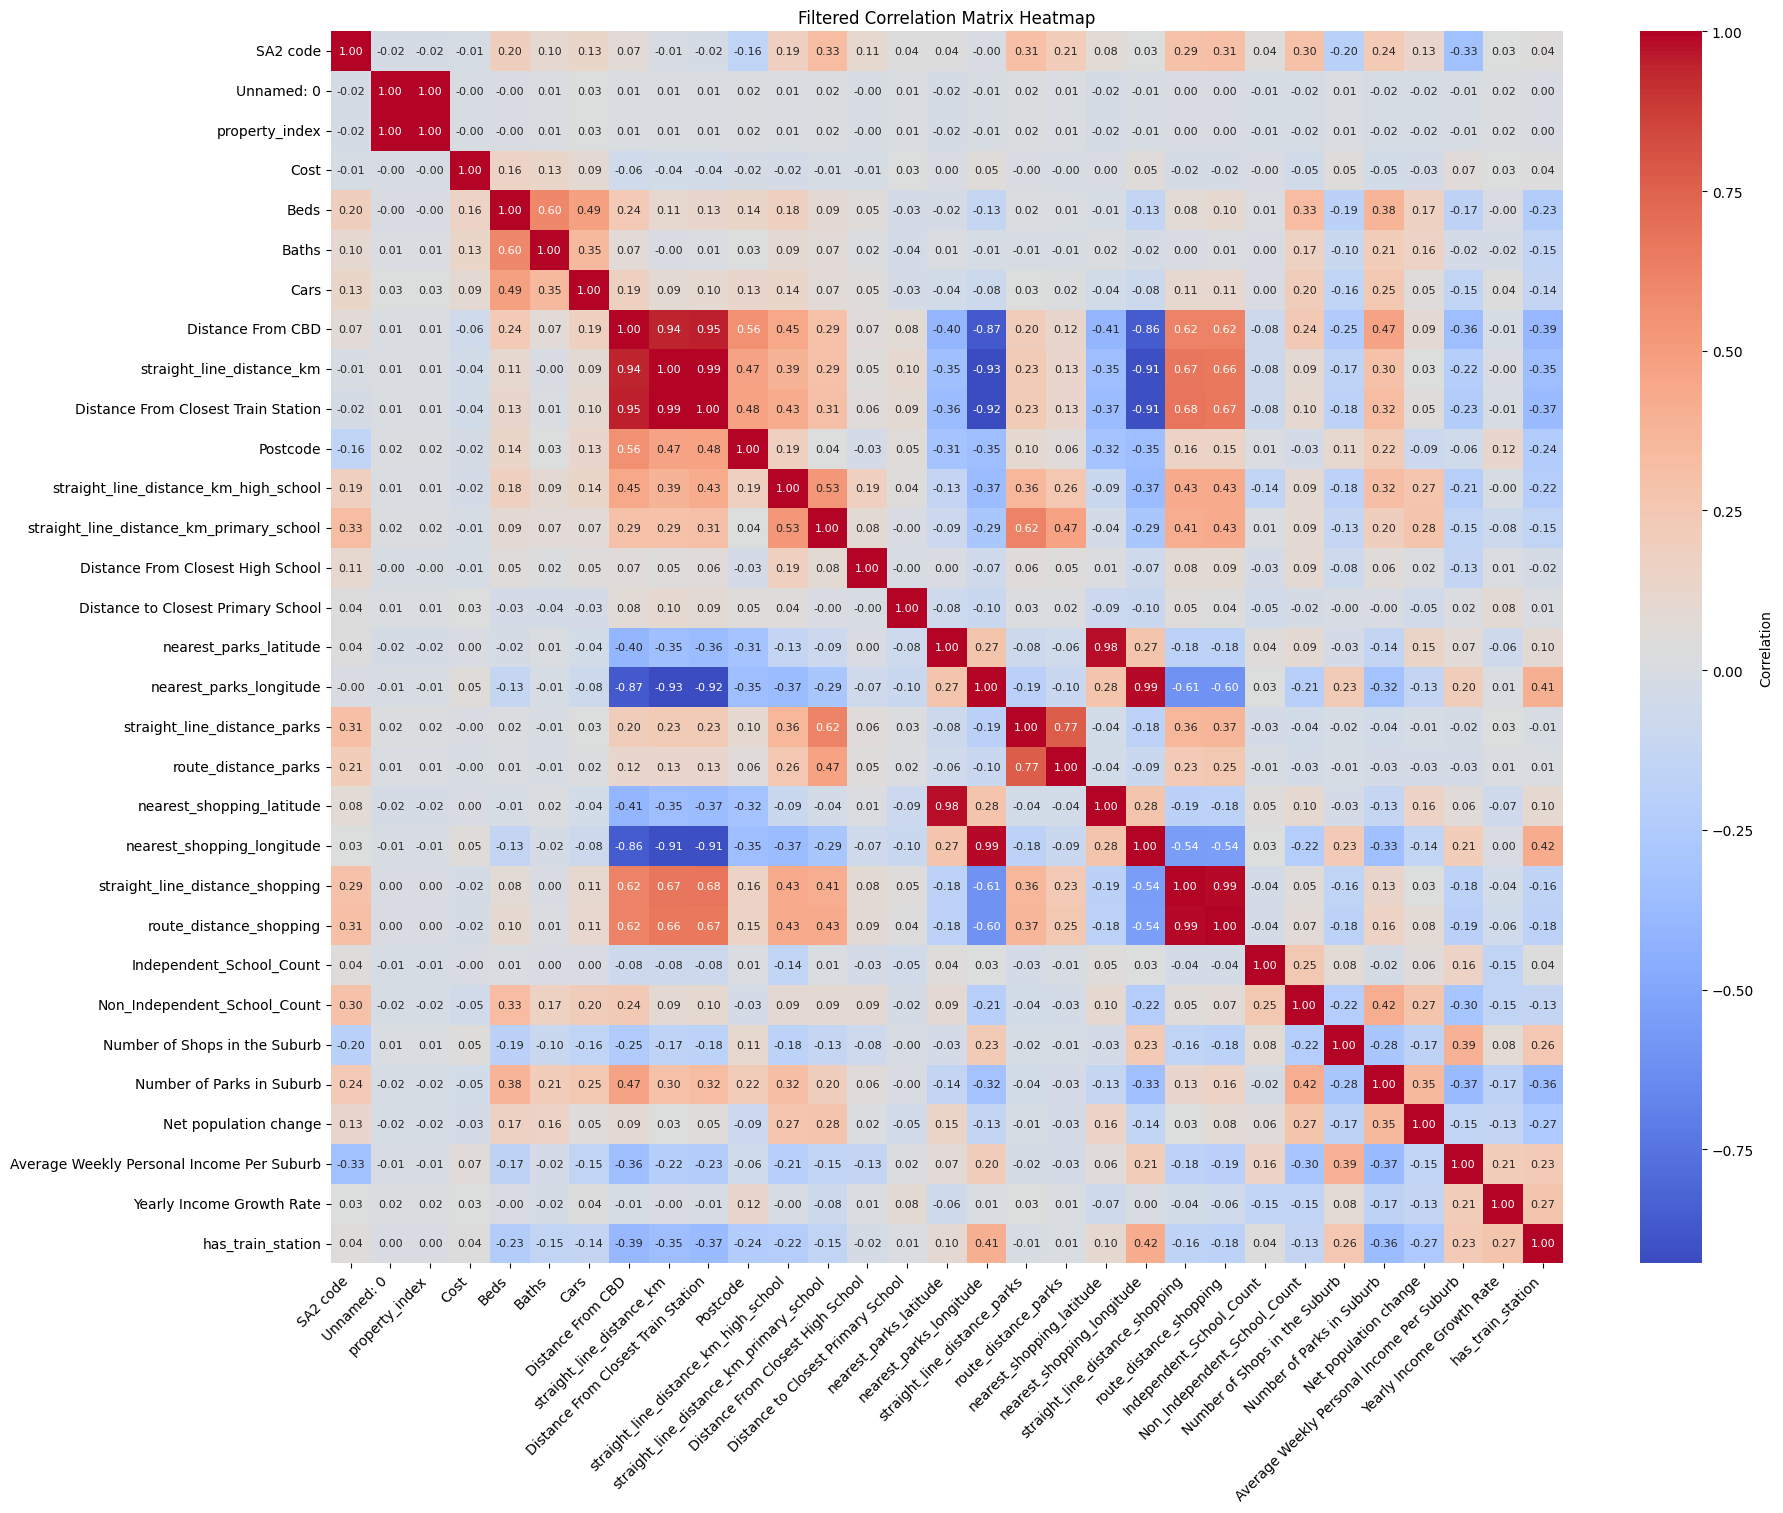

Correlation Matrix:
                                           SA2 code  Unnamed: 0  \
SA2 code                                   1.000000   -0.023969   
Unnamed: 0                                -0.023969    1.000000   
property_index                            -0.023956    0.999992   
Cost                                      -0.012146   -0.004706   
Beds                                       0.199937   -0.000504   
Baths                                      0.099104    0.009136   
Cars                                       0.133887    0.031669   
Distance From CBD                          0.066805    0.006834   
straight_line_distance_km                 -0.009378    0.007748   
Distance From Closest Train Station       -0.017506    0.008376   
Postcode                                  -0.156565    0.018106   
straight_line_distance_km_high_school      0.186461    0.012413   
straight_line_distance_km_primary_school   0.329184    0.015792   
Distance From Closest High School         

In [86]:
# Reading data
df = pd.read_csv('../data/curated/rental_merged.csv')

df['Cars'] = df['Cars'].fillna(0.0)
df = df.rename(columns = {'value_2019':'Average Weekly Personal Income Per Suburb', 'avg_yearly_growth_rate':'Yearly Income Growth Rate', 
                          'distance_to_cbd_km':'Distance From CBD', 'route_distance_to_closest_train_km':'Distance From Closest Train Station',
                          'route_distance_to_closest_high_school_km':'Distance From Closest High School', 
                          'shopping_count':'Number of Shops in the Suburb', 'hospital_count':'Number of Hospitals in the Suburb',
                          'route_distance_hospital':'Distance From Closest Hospital', 'parks_count':'Number of Parks in Suburb',
                          'route_distance_to_closest_primary_school_km':'Distance to Closest Primary School'})
df.to_csv('../data/curated/rental_merged.csv')

# Encoding categorical features
encoded_df = pd.get_dummies(df, columns=['Property Type', 'Suburb', 'closest_high_school_type', 'closest_primary_school_type'], drop_first=True)

correlation_df = encoded_df.select_dtypes(include=['float64', 'int64', 'uint8'])

# Generating the correlation matrix
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(20, 16))  # Larger figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=correlation_matrix.isnull(),
            annot_kws={"size": 8},  # Smaller annotation size
            cbar_kws={'label': 'Correlation'}, square=True)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title(f'Filtered Correlation Matrix Heatmap')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

#saving results as a csv
correlation_matrix.to_csv('../data/curated/correlation_matrix.csv')


Creating and training a XG Boost model

In [88]:
# Checking for any missing target values
print(f"Missing values in 'Cost': {df['Cost'].isna().sum()}")

# Dropping those
df = df.dropna(subset=['Cost'])

# Log-transforming target variable
y = np.log1p(df['Cost'])  

# Dropping unnecessary columns based on the carrelation matrix
df = df.drop(columns=[
    'closest_high_school', 'closest_primary_school', 'nearest_parks_name', 'nearest_shopping_name',
    'closest_train_station', 'Address', 'coordinates', 'Postcode',
    'straight_line_distance_km_high_school', 'straight_line_distance_km_primary_school', 'straight_line_distance_parks',
    'nearest_parks_latitude', 'nearest_parks_longitude', 'straight_line_distance_shopping', 'straight_line_distance_km',
    'nearest_shopping_latitude', 'nearest_shopping_longitude', 'SA2 name',
    'SA2 code', 'Unnamed: 0'
])

X = df.drop(columns=['Cost'])

# Splitting data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].astype(str)

# Imputation and scaling for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

# Imputation and encoding for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


xgb_model = XGBRegressor(random_state=42)

# Modelling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [5, 10, 20],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

# Setting up cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting model
grid_search.fit(X_train, y_train)

# Finding best model
best_model = grid_search.best_estimator_

# Predicting
y_pred = best_model.predict(X_test)

y_pred_inverse = np.expm1(y_pred)
y_test_inverse = np.expm1(y_test)

# Evaluating model
rmse = mean_squared_error(y_test_inverse, y_pred_inverse, squared=False)
print(f"Root Mean Squared Error: {rmse}")

std_dev = np.std(y_test_inverse)
standardized_rmse = rmse / std_dev
print(f"Standardized RMSE: {standardized_rmse}")


Missing values in 'Cost': 0
Root Mean Squared Error: 281.5678744590986
Standardized RMSE: 0.7601341620940706


/Users/maryzhang/myenv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Now, using the model results to find the top 10 features with the most importance

                                      Feature  Importance
1                                      Suburb    0.825591
0                               Property Type    0.064843
4                                       Baths    0.029497
5                                        Beds    0.016687
3                 Closest Primary School Type    0.012627
6   Average Weekly Personal Income Per Suburb    0.005210
7                           Distance From CBD    0.005124
8               Number of Shops in the Suburb    0.003966
9                   Number of Parks in Suburb    0.003852
10          Distance From Closest High School    0.003460


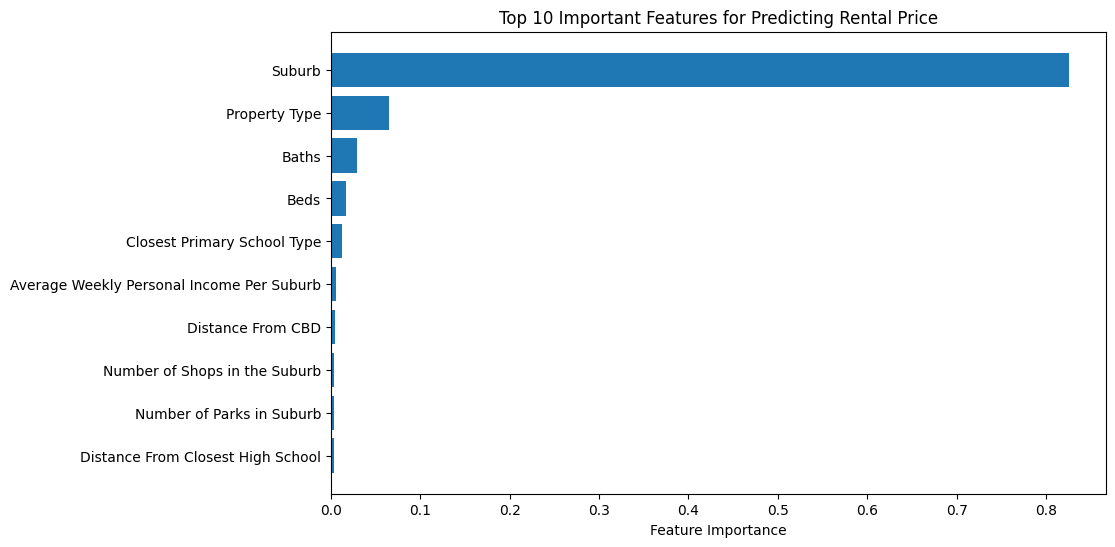

In [92]:
encoder = best_model.named_steps['preprocessor'].transformers_[1][1] 
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Combine numeric feature names and encoded categorical feature names
feature_names = list(numeric_features) + list(encoded_feature_names)

# Feature importance
importances = best_model.named_steps['model'].feature_importances_

if len(feature_names) == len(importances):
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
else:
    print(f"Mismatch in lengths: {len(feature_names)} feature names, {len(importances)} importances.")

property_type_features = [feature for feature in feature_names if feature.startswith('Property Type_')]
suburb_features = [feature for feature in feature_names if feature.startswith('Suburb_')]
high_school_type_features = [feature for feature in feature_names if feature.startswith('closest_high_school_type_')]
primary_school_type_features = [feature for feature in feature_names if feature.startswith('closest_primary_school_type_')]

# Sum the importances for each feature with subgroups
aggregated_importances = {
    'Property Type': importance_df[importance_df['Feature'].isin(property_type_features)]['Importance'].sum(),
    'Suburb': importance_df[importance_df['Feature'].isin(suburb_features)]['Importance'].sum(),
    'Closest High School Type': importance_df[importance_df['Feature'].isin(high_school_type_features)]['Importance'].sum(),
    'Closest Primary School Type': importance_df[importance_df['Feature'].isin(primary_school_type_features)]['Importance'].sum()
}

# Finding the importance for individual features
numeric_feature_importances = importance_df[~importance_df['Feature'].isin(property_type_features + suburb_features + high_school_type_features + primary_school_type_features)]
for numeric_feature in numeric_feature_importances['Feature']:
    aggregated_importances[numeric_feature] = numeric_feature_importances[numeric_feature_importances['Feature'] == numeric_feature]['Importance'].values[0]

aggregated_importance_df = pd.DataFrame(list(aggregated_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print(aggregated_importance_df.head(10))

# Plot the aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance_df['Feature'][:10], aggregated_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Predicting Rental Price')
plt.gca().invert_yaxis()
plt.show()


Applying a log transformation to the graph

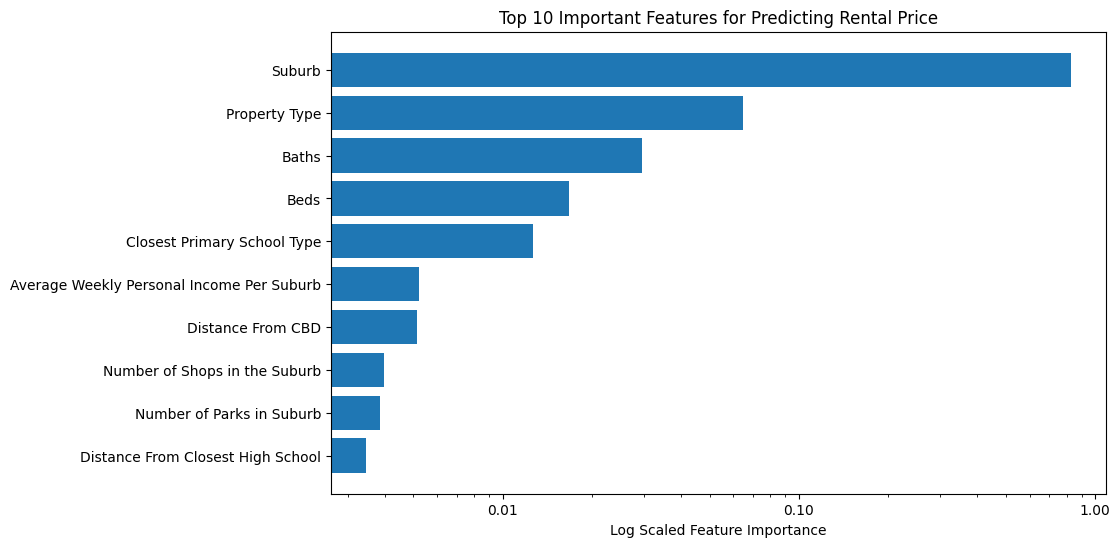

In [102]:

def log_format(x, pos):
    return f'{x:.2f}'  

plt.figure(figsize=(10, 6))

plt.barh(aggregated_importance_df['Feature'][:10], aggregated_importance_df['Importance'][:10])
plt.xscale('log')

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(log_format))

plt.xlabel('Log Scaled Feature Importance')
plt.title('Top 10 Important Features for Predicting Rental Price')

plt.gca().invert_yaxis()

plt.show()




Using the predictions to graph the model performance on a subset of suburbs

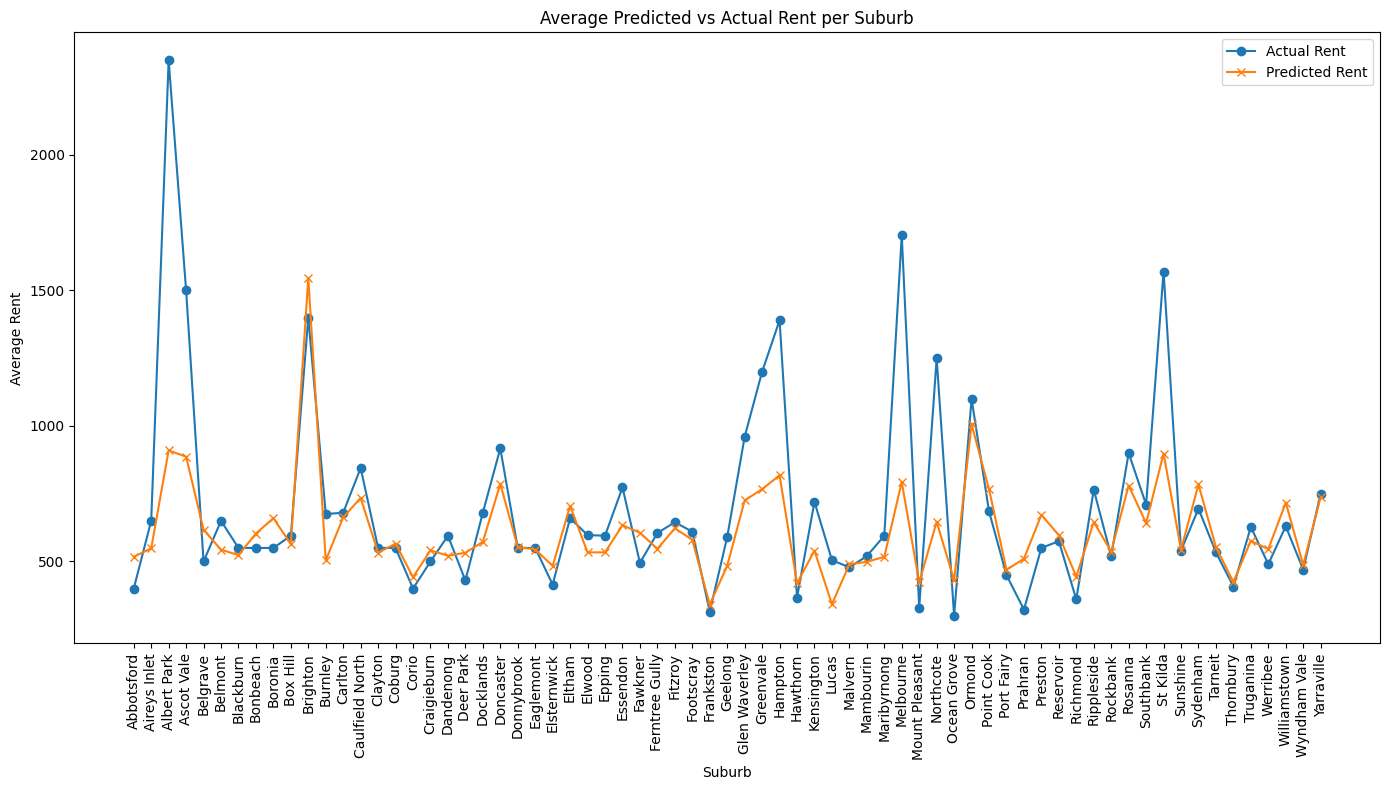

In [93]:
y_pred = best_model.predict(X_test)
y_pred_inverse = np.expm1(y_pred) 
y_test_inverse = np.expm1(y_test)  

X_test_df = X_test.copy()
X_test_df['Actual Rent'] = y_test_inverse
X_test_df['Predicted Rent'] = y_pred_inverse
suburb_column = 'Suburb' 
X_test_df[suburb_column] = X_test[suburb_column].tail(100)

# Grouping by suburb to calculate average actual and predicted rent
average_rent_df = X_test_df.groupby(suburb_column).agg({
    'Actual Rent': 'mean',
    'Predicted Rent': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# Plot actual rent
plt.plot(average_rent_df[suburb_column], average_rent_df['Actual Rent'], label='Actual Rent', marker='o')

# Plot predicted rent
plt.plot(average_rent_df[suburb_column], average_rent_df['Predicted Rent'], label='Predicted Rent', marker='x')

plt.xlabel('Suburb')
plt.ylabel('Average Rent')
plt.title('Average Predicted vs Actual Rent per Suburb')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

plt.tight_layout()
plt.show()
